## Fourier Transforms Example: Light Switch

Suppose we turn a light switch at $t=t_0-\tau/2$, and turn it off at $t=t_0+\tau/2$. We treat $\tau$ and $t_0$ as constant parameters. The light emitted during this interval has average frequency $\nu_0$, also a constant parameter.

The field emitted is:
$$E = E_0\text e^{-2 i\pi \nu_0 t}\quad \text{if}\quad t_0 - \frac\tau2\leq t\leq t_0 + \frac\tau2,\qquad E = 0\quad\text{otherwise}.$$

Apply the Fourier Transform formula to get the field in "frequency space", i.e. as a function of frequency $\nu$ rather than time $t$.
$$\hat E = \int_{t_0-\tau/2}^{t_0+\tau/2} E(t)\text e^{2\pi i (\nu-\nu_0) t} \text d \nu = E_0\tau \text e^{2\pi i (\nu-\nu_0) t_0}\underbrace{\frac{\sin\left[\pi(\nu-\nu_0)\tau\right]}{\pi(\nu-\nu_0)\tau}}_{=\text{sinc}\left[(\nu-\nu_0)\tau\right]},$$
where $\text{sinc}$ is called the Cardinal sine function.

Let's use parameters: $\tau = 1s,~t_0 = 10s,~\nu_0=5$ Hz

In [77]:
import numpy as np
import matplotlib.pyplot as plt
tau = 1 # s
t0 = 10 # s
v0 = 5 # Hz
i = complex(0, 1) # complex number

In [78]:
def E(t, E0, v0):
    return E0*np.exp(-2*i*np.pi*v0*t)

In [75]:
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["hotpink", "cornflowerblue", "yellowgreen"]) 

### Exercise 1

Calculate and plot the mormalized real part of the field, $real(E) / E_0$, from $t_0 - \frac\tau2\leq t\leq t_0 + \frac\tau2$. Hint: when discretizing time, try using 4096 values.

In [79]:
np.real(i)

0.0

Text(0, 0.5, '$Re(E)/E_0$')

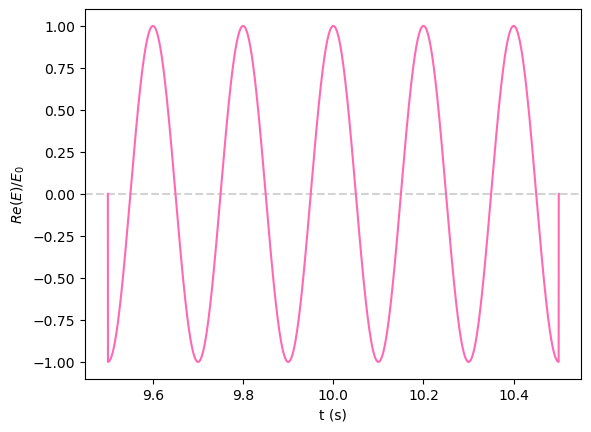

In [80]:
# Set some value for E0, which won't matter in the end, since we're plotting the 
# normalized field
E0 = 1

ts = np.linspace(t0-tau/2, t0+tau/2, 4096)
Es = E(ts, E0, v0)
# set value at boundaries (t0-tau/2, t0+tau/2) to 0
Es[0] = 0
Es[-1] = 0

plt.axhline(0, linestyle="--", color="lightgrey")
plt.plot(ts, np.real(Es)/E0)
plt.xlabel("t (s)")
plt.ylabel(f"$Re(E)/E_0$")

### Exercise 2

Now calculate, using the formula given (not using a packaged routine), the Fourier transform of the signal, i.e. $\hat{E}(\nu)$, for $0 \leq \nu \leq \nu_0$. Make two plots: $real(\hat{E}) / (E_0 \tau)$ as a function of $\nu$, and $|\hat{E}| / (E_0 \tau) $ as a function of $\nu$. The second plot, which shows normalized amplitudes, is called the spectrum of the signal.

Note:
* Spectrum is centred around $\nu=\nu_0$, but non-negligible width (i.e. not all the light has frequency exactly $\nu_0$.) So the plane wave approximation doesn't exactly hold.
* If you increase duration or increase frequency: spectrum is narrower around $\nu=\nu_0$, and you have a better plane wave approximation.
* If you shorten duration or decrease frequency (e.g. pulsed laser): the frequency spreads out. (See https://www.nobelprize.org/prizes/physics/2023/press-release/ , Nobel Prize for attosecond lasers)
* Bandwidth theorem:
    $$\tau\Delta\nu \approx 1$$
    *You may recognize something like Heisenberg's uncertainty principle!*

In [81]:
def EHat(v, E0, tau, v0, t0):
    return E0*tau*np.exp(2*np.pi*i*(v-v0)*t0)* np.sin(np.pi*(v-v0)*tau) / (np.pi*(v-v0)*tau) 

E0 = 1

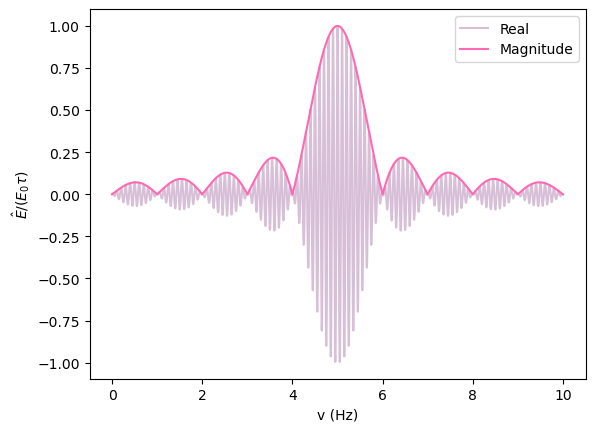

In [82]:
vs = np.linspace(v0-v0, v0+v0, 4096)
EHats = EHat(vs, E0, tau, v0, t0)

plt.plot(vs, np.real(EHats)/(E0*tau), color="thistle", label=f"Real")
plt.plot(vs, np.abs(EHats)/(E0*tau), label=f"Magnitude")
plt.xlabel("v (Hz)")
plt.ylabel(f"$\^E/(E_0\\tau)$")
plt.legend()

## DFT Example: Pitch (Sound) Timeseries

Adapted from textbook's online material.

### Exercise 3

Using numpy.loadtxt, read in the text file "pitch.txt" provided. The values are floats. 

The file represents a "time series" of samples of the pitch of a sound wave, i.e. the next value in the series represents the pitch at the next sample. The samples are taken at a frequency of 44100 Hz.

Make a plot of pitch (arbitrary units) vs time.

In [117]:
dt = 1/44100 # s
pitch = np.loadtxt("pitch.txt")
T = len(pitch)*dt # total time
times = np.arange(0, T, dt)
pitch

array([ 0.455179 ,  0.345091 ,  0.0404799, ..., -0.629429 , -0.796315 ,
       -0.728081 ])

Text(0, 0.5, 'pitch (a.u.)')

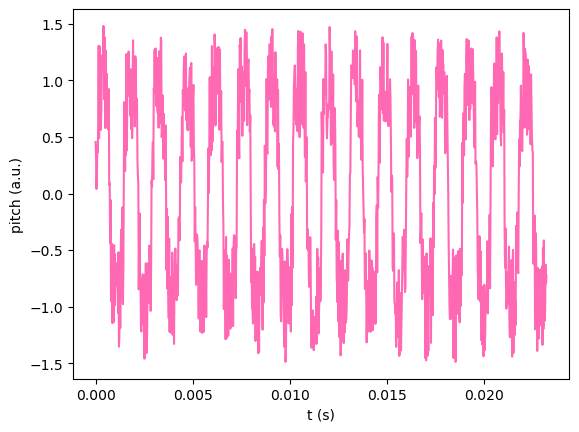

In [118]:
plt.plot(times, pitch)
plt.xlabel("t (s)")
plt.ylabel("pitch (a.u.)")

### Exercise 4

Perform a Discrete Fourier Transform on the time series (the following code snippet from the textbook will help you). Using time.time, measure how long the transform takes. 

Plot the amplitudes (i.e. magnitudes) of the Fourier coefficients.

In [60]:
import time

In [91]:
def dft(y):
    N = len(y)
    c = np.zeros(N//2+1, complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*np.exp(-2j*np.pi*k*n/N)
    return c

'time: 532.95 ms'

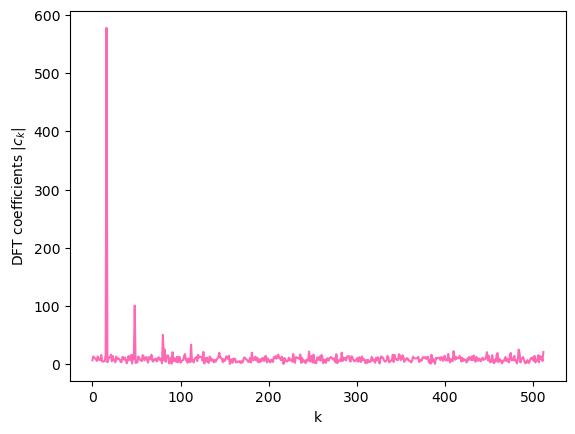

In [106]:
t0 = time.time()
cs_dft = dft(pitch)
t_dft = time.time() - t0

plt.plot(np.abs(cs_dft))
plt.xlabel("k")
plt.ylabel(f"DFT coefficients $|c_k|$")
f"time: {t_dft*1e3:.2f} ms"


## FFT Example: De-Noising a Signal

### Exercise 5

Repeat Exercise 4, but using numpy.fft.rfft instead of the dft code snippet from the textbook. Which algorithm is faster, and by how much? How close are the transform results?

In [73]:
?np.fft.rfft

Signature: np.fft.rfft(a, n=None, axis=-1, norm=None)
Docstring:
Compute the one-dimensional discrete Fourier Transform for real input.

This function computes the one-dimensional *n*-point discrete Fourier
Transform (DFT) of a real-valued array by means of an efficient algorithm
called the Fast Fourier Transform (FFT).

Parameters
----------
a : array_like
    Input array
n : int, optional
    Number of points along transformation axis in the input to use.
    If `n` is smaller than the length of the input, the input is cropped.
    If it is larger, the input is padded with zeros. If `n` is not given,
    the length of the input along the axis specified by `axis` is used.
axis : int, optional
    Axis over which to compute the FFT. If not given, the last axis is
    used.
norm : {"backward", "ortho", "forward"}, optional
    .. versionadded:: 1.10.0

    Normalization mode (see `numpy.fft`). Default is "backward".
    Indicates which direction of the forward/backward pair of transform

'Difference in computation time: 532.61 ms'

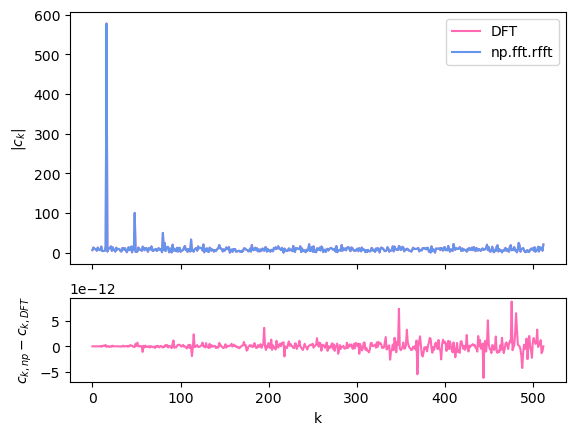

In [116]:
t0 = time.time()
cs_np = np.fft.rfft(pitch)
t_np = time.time() - t0

fig, axs = plt.subplots(2, 1, height_ratios=[3, 1], sharex=True)
axs[0].plot(np.abs(cs_dft), label="DFT")
axs[0].plot(np.abs(cs_np), label="np.fft.rfft")
axs[1].plot(np.abs(cs_np) - np.abs(cs_dft))
axs[1].set_xlabel("k")
axs[0].set_ylabel(f"$|c_k|$")
axs[1].set_ylabel("$c_{k, np} - c_{k, DFT}$")
axs[0].legend(loc=0)
f"Difference in computation time: {(t_dft - t_np)*1000:.2f} ms"

Numpy is ~500 ms faster than the DFT implementation, although both give similar results.

### Exercise 6

We now seek to "de-noise" the signal. We will treat the three highest-amplitude frequencies as our "signal" which we want to isolate, and everything else as the "noise" which we want to eliminate. 

Convert the Fourier coefficients to frequencies by dividing them by $T$ (the total length of the time interval covered by the time series.) Now you should have an array of frequencies and an array of corresponding amplitudes.

Sort the frequencies by amplitude (you can use numpy.argsort if you like). Print the three "signal" frequencies, and their corresponding amplitudes.

In [187]:
j_sort = np.argsort(np.abs(cs_np))[::-1] # reverse the sort indices 
                                        # so array is decreasing

freq = j_sort/T
amp = cs_np
np.abs(freq[0:3]), np.abs(amp[j_sort][0:3])

(array([ 689.0625, 2067.1875, 3445.3125]),
 array([577.64230191, 100.4604948 ,  50.23957701]))

A roughly estimate of the dominant frequency: 

(18, 85)

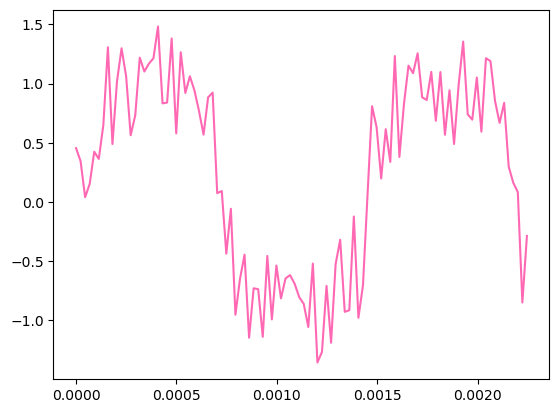

In [196]:
plt.plot(times[0:100], pitch[0:100])
# indices of the first and second maxima
np.argmax(pitch[0:50]), np.argmax(pitch[50:100]) + 50

In [198]:
# estimate dominant frequency in Hz
1/(times[50+35]-times[18])

658.2089552238806

### Exercise 7

Now we will isolate the "noise".

Create a copy of the array of amplitudes (use numpy.copy). In the copy, zero out the largest three amplitudes (which you identified in the previous exercise). Inverse-transform the result, using np.fft.irfft, to get an array of pitch values. Plot it vs time.

Text(0, 0.5, 'noise (a.u.)')

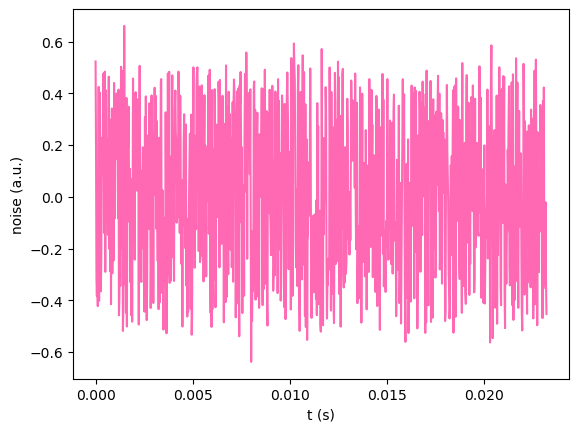

In [177]:
amp_copy = np.copy(amp)
amp_copy[j_sort[0:3]] = [0,0,0]

pitch_irfft = np.fft.irfft(amp_copy)
plt.plot(times, pitch_irfft)
plt.xlabel("t (s)")
plt.ylabel("noise (a.u.)")

### Exercise 8

Finally, let's plot the signal, i.e. the data with the noise subtracted out. Subtract your Exercise 7 array of pitch values from your original (Exercise 3) array of pitch values. Plot the result vs time.

Does the plot look a lot different from the results of Exercise 3?

Text(0, 0.5, 'pitch (a.u.)')

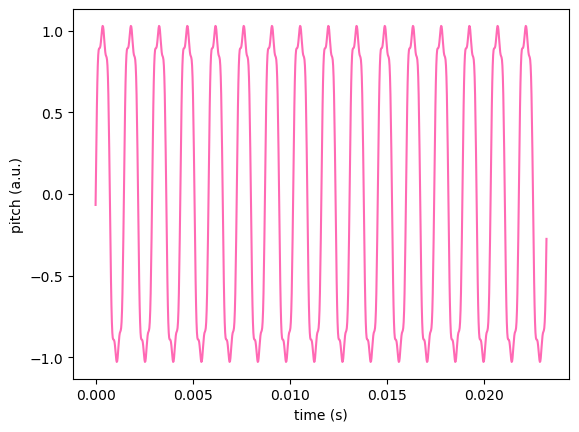

In [178]:
pitch_denoised = pitch - pitch_irfft
plt.plot(times, pitch_denoised)
plt.xlabel("time (s)")
plt.ylabel("pitch (a.u.)")

It's less noisy 😋